In [ ]:
#Techniques for outlier detection and removal
#Z-Score treatment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv')
df.sample(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
658,11,127,106,0,0,39.0,0.190,51,0
348,3,99,62,19,74,21.8,0.279,26,0
459,9,134,74,33,60,25.9,0.460,81,0
23,9,119,80,35,0,29.0,0.263,29,1
585,1,93,56,11,0,22.5,0.417,22,0


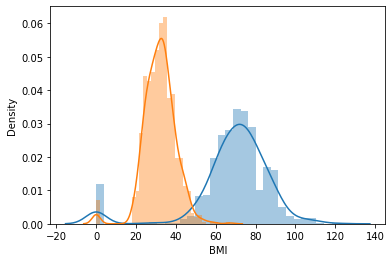

In [ ]:
sns.distplot(df["BloodPressure"])
sns.distplot(df['BMI'])

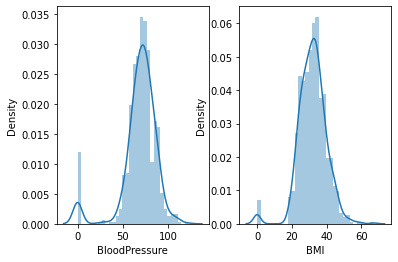

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.subplot(1,2,1)
sns.distplot(df["BloodPressure"])
plt.subplot(1,2,2)
sns.distplot(df['BMI'])

In [ ]:
#Finding boundry values
upper_limit = df['BloodPressure'].mean() + 3*df['BloodPressure'].std()
lower_limit = df['BloodPressure'].mean() - 3*df['BloodPressure'].std()
print(upper_limit)
print(lower_limit)


127.17289026193433
11.038047238065673


In [ ]:
#finding outliers
df[(df['BloodPressure']> 127.172890 ) | (df['BloodPressure'] < 11.038047 )]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


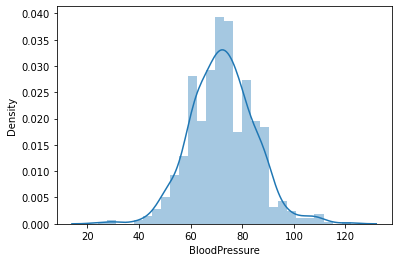

In [ ]:
new_df = df[(df['BloodPressure'] < 127.172890 ) & (df['BloodPressure'] > 11.038047 )]
new_df
sns.distplot(new_df["BloodPressure"])

In [ ]:
#capping teachnique
upper_limit = df['BloodPressure'].mean() + 3*df['BloodPressure'].std()
lower_limit = df['BloodPressure'].mean() - 3*df['BloodPressure'].std()


In [ ]:
#apply capping
df['BloodPressure'] = np.where(
   df['BloodPressure']>upper_limit,
   upper_limit,
   np.where(
       df['BloodPressure']<lower_limit,
       lower_limit,
       df['BloodPressure']
   )
)


In [ ]:
df['BloodPressure'].describe()

count    768.000000
mean      69.608505
std       17.616411
min       11.038047
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [ ]:
#Finding the IQR
percentile25 = df['Pregnancies'].quantile(0.25)
percentile75 = df['Pregnancies'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)


5.0
1.0
6.0


In [ ]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)


13.5
-6.5


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt



In [ ]:
# Read in the dataset
airbnb = pd.read_csv('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col = 'Unnamed: 0')


In [ ]:
# Print the header of the DataFrame
airbnb.head()
# Print number of missing values
airbnb.isna().sum()


listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

In [ ]:
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: f

In [ ]:
airbnb.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

In [ ]:
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


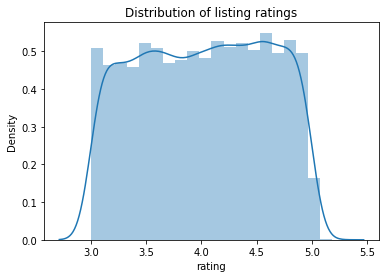

In [ ]:
#visualise the distribution of rating column
sns.distplot(airbnb['rating'],bins=20)
plt.title('Distribution of listing ratings')
plt.show()

In [ ]:
#No of unique values in room column
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [ ]:
#how many values of different room type we have
airbnb['room_type'].value_counts()

Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: room_type, dtype: int64

In [ ]:
# Remove "(" and ")" from coordinates
airbnb['coordinates'] = airbnb['coordinates'].str.replace("(","")
airbnb['coordinates'] = airbnb['coordinates'].str.replace(")","")
# Print the header of the column
airbnb['coordinates'].head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [ ]:
#split column into two
lst_long = airbnb['coordinates'].str.split(",", expand = True)
lst_long.head()

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [ ]:
lst_long = airbnb['coordinates'].str.split(",",expand=True)
lst_long.head()

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [ ]:
#assign correct value to latitude and longitude columns in airbnb
airbnb['latitude']= lst_long[0]
airbnb['longitude']= lst_long[0]
airbnb.dtypes


listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude               object
longitude              object
dtype: object

In [ ]:
airbnb.drop('coordinates',axis=1,inplace=True)

In [ ]:
#remove $ from price before conversion to float
airbnb['price'] = airbnb['price'].str.strip("$")
#calculate mean of price after conversion
airbnb['price'].head()

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [ ]:
#remove $ from price before conversion to float
airbnb['price'] = airbnb['price'].astype('float')
#calculate mean of price after conversion
airbnb['price'].mean()

150.90512217564665

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


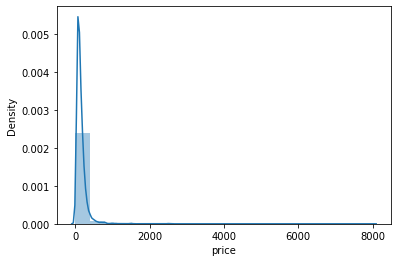

In [ ]:
sns.distplot(airbnb['price'],bins=20)
plt.show()

In [ ]:
#print header of two columns
airbnb[['listing_added','last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaN
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [ ]:
#convert both column to datetime
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'],format = '%Y-%m-%d')
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'],format = '%Y-%m-%d')


In [ ]:
#print header and datatypes of both column again
print(airbnb[['listing_added','last_review']].head())
print(airbnb[['listing_added','last_review']].dtypes)

  listing_added last_review
0    2018-06-08  2018-12-12
1    2018-12-25  2019-06-30
2    2018-08-15         NaT
3    2017-03-20  2017-09-23
4    2020-10-23  2019-06-12
listing_added    datetime64[ns]
last_review      datetime64[ns]
dtype: object


In [ ]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [ ]:
#deal with capitalise value
airbnb['room_type'] = airbnb['room_type'].str.lower()
airbnb['room_type'].unique()


array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [ ]:
#deal with capitalise value
airbnb['room_type'] = airbnb['room_type'].str.strip()
airbnb['room_type'].unique()



array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [ ]:
#replace values of 'Shared rooms', 'Entire Place', 'Privare room' and 'Hotel room'
mappings = {'private room':'Private Room',
            'private' : 'Private Room',
            'entire home/apt' : 'Entire place',
            'shared room': 'Shared room',
            'home' : 'Entire place'
    }

airbnb['room type'] = airbnb['room_type'].replace(mappings)
airbnb['room type'] .unique()

array(['Private Room', 'Entire place', 'Shared room'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


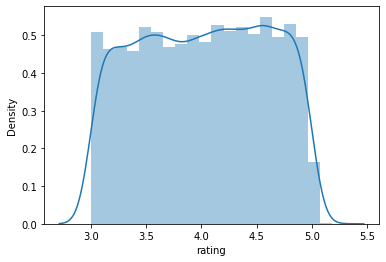

In [ ]:
sns.distplot(airbnb['rating'],bins=20)
plt.show()

In [ ]:
airbnb[airbnb['rating']>5.0]

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,room type
1925,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,"Manhattan, Lower East Side",entire home/apt,150.0,1,2019-07-06,1.0,13,5.017040,1.2,0.870161,2018-12-31,40.71825,40.71825,Entire place
6732,36390226,Comfortable clean Bedstuy private room,267932490,Angela,"Brooklyn, Bedford-Stuyvesant",private room,45.0,2,2019-07-08,2.0,14,5.087091,2.4,0.950339,2019-01-02,40.69551,40.69551,Private Room
8821,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,"Brooklyn, Brooklyn Heights",entire home/apt,550.0,1,2019-07-07,1.0,230,5.181114,1.2,0.805418,2019-01-01,40.69827,40.69827,Entire place


In [ ]:
#drop these rows and they have effected changes
airbnb.drop(airbnb[airbnb['rating']>5.0].index, inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


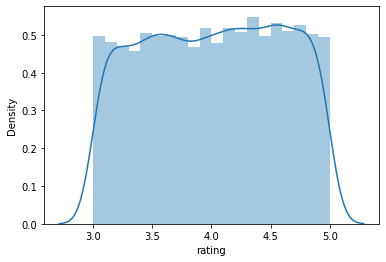

In [ ]:
sns.distplot(airbnb['rating'],bins=20)
plt.show()

In [ ]:
airbnb['rating'].max()

4.999561104773598

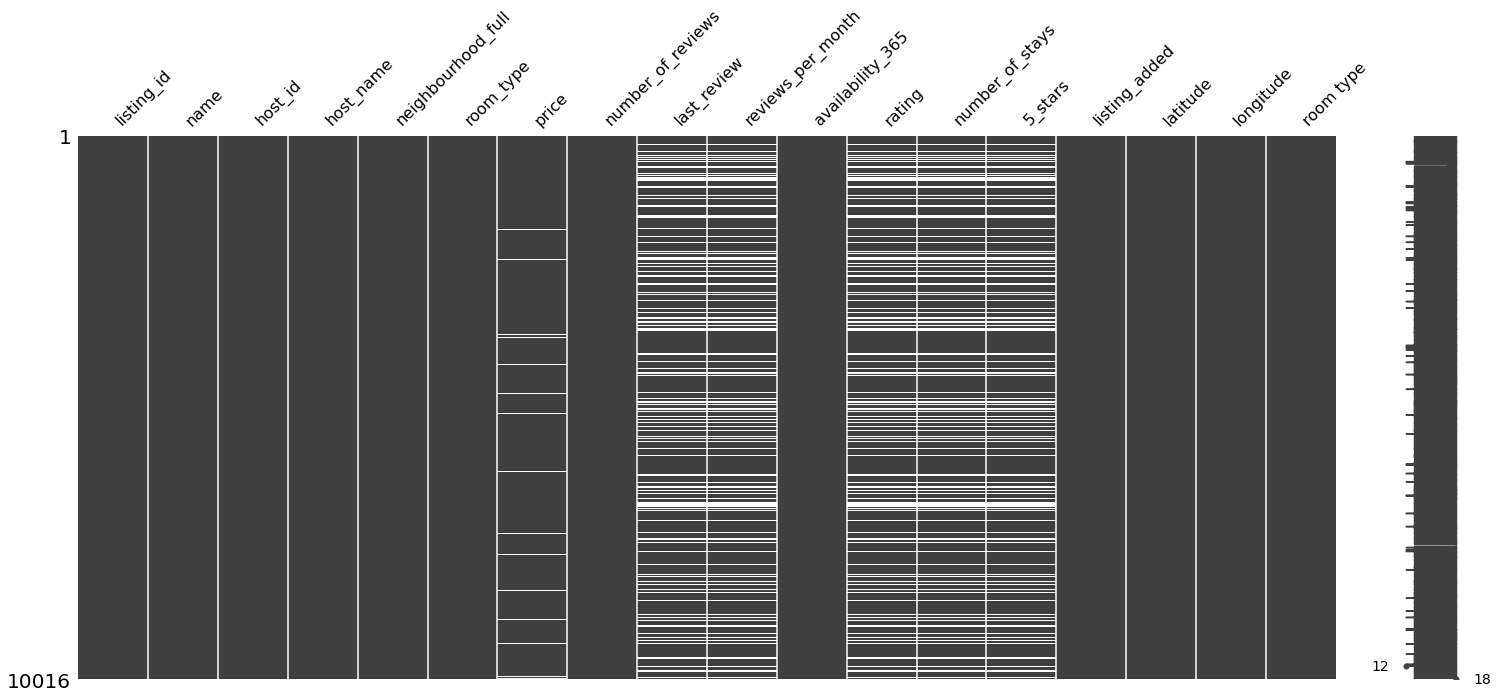

In [ ]:
#visualise the missingness
msno.matrix(airbnb)
plt.show()

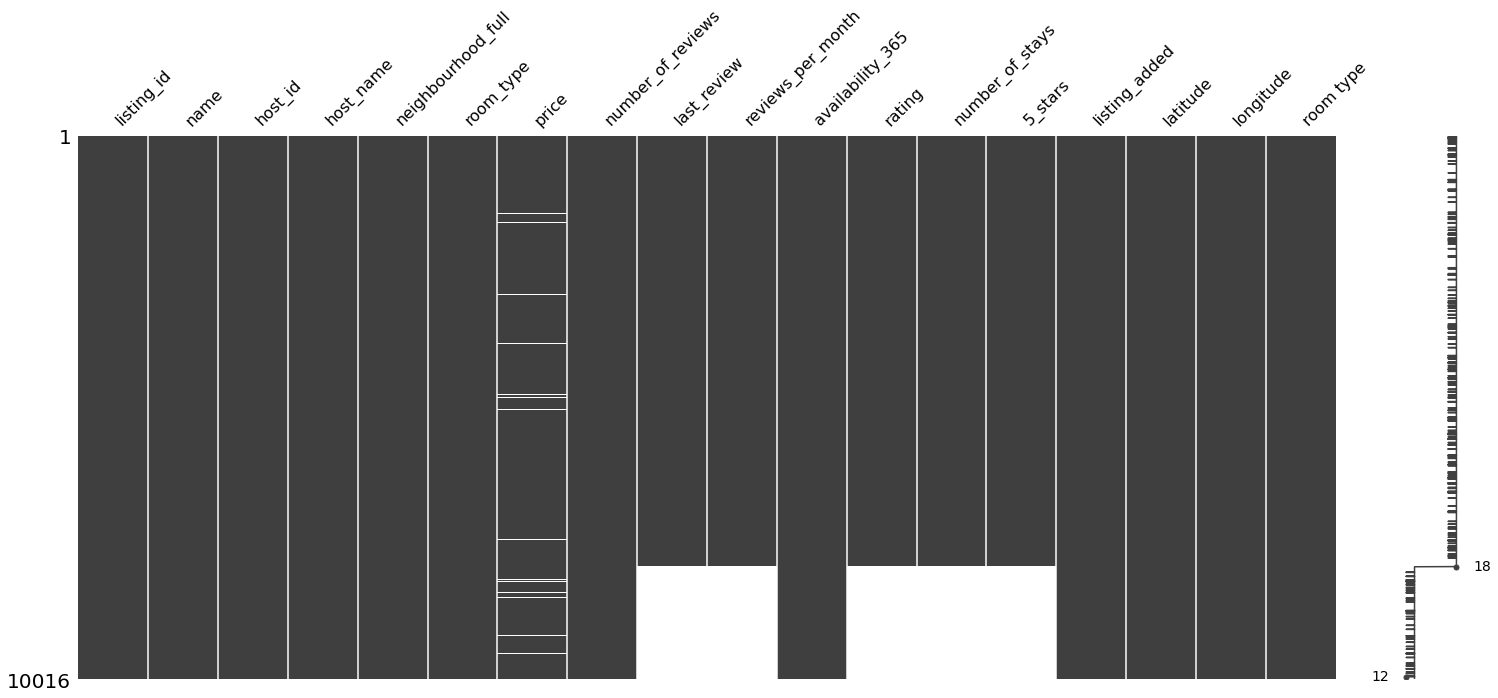

In [ ]:
#visualise the missingness on sorted values
msno.matrix(airbnb.sort_values(by="rating"))
plt.show()

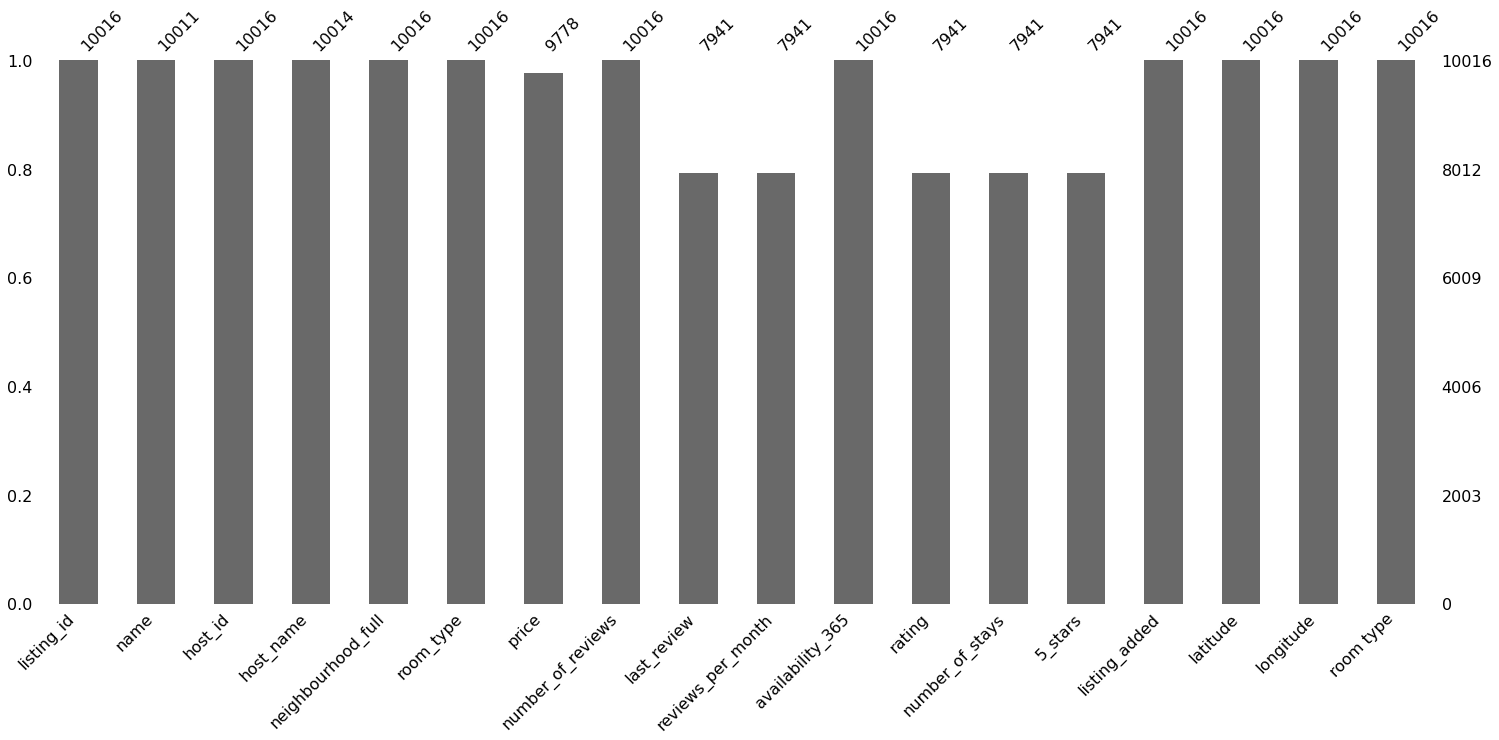

In [ ]:
#missingness barplot
msno.bar(airbnb)

In [ ]:
#understnd dataframe with missing values in ratings, number_of_stays, 5_stars, reviews_per_month
airbnb[airbnb['rating'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,2.075000e+03,2.075000e+03,2028.000000,2075.0,0.0,2075.000000,0.0,0.0,0.0
mean,2.274238e+07,8.022455e+07,191.553748,0.0,NaN,104.531566,NaN,NaN,NaN
std,1.123730e+07,8.663163e+07,316.186639,0.0,NaN,138.266525,NaN,NaN,NaN
min,6.358800e+04,1.475100e+04,0.000000,0.0,NaN,0.000000,NaN,NaN,NaN
25%,1.232923e+07,1.224305e+07,70.000000,0.0,NaN,0.000000,NaN,NaN,NaN
50%,2.345182e+07,4.040116e+07,120.000000,0.0,NaN,7.000000,NaN,NaN,NaN
75%,3.400364e+07,1.333498e+08,205.250000,0.0,NaN,211.000000,NaN,NaN,NaN
max,3.648724e+07,2.741034e+08,5250.000000,0.0,NaN,365.000000,NaN,NaN,NaN


In [ ]:
#impute misiing data
airbnb = airbnb.fillna({'reviews_per_month':0,
                        'number_of_stays':0,
                        '5_stars':0})
#create is_rated column
is_rated = np.where(airbnb['rating'].isna() == True, 0,1)
airbnb['is_rated'] = is_rated

In [ ]:
#Investigate Dataframe with missing value in price
airbnb[airbnb['price'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,is_rated
count,2.380000e+02,2.380000e+02,0.0,238.000000,238.000000,238.000000,191.000000,238.000000,238.000000,238.000000
mean,1.805656e+07,6.262965e+07,NaN,22.445378,1.117563,98.953782,4.078343,26.934454,0.577721,0.802521
std,1.065176e+07,7.518785e+07,NaN,35.798003,1.666262,125.872256,0.568705,42.957603,0.297066,0.398936
min,8.092400e+04,1.145900e+05,NaN,0.000000,0.000000,0.000000,3.007359,0.000000,0.000000,0.000000
25%,8.282298e+06,6.034050e+06,NaN,1.000000,0.080000,0.000000,3.646496,1.200000,0.613462,1.000000
50%,1.863600e+07,2.809524e+07,NaN,6.000000,0.350000,23.000000,4.149203,7.200000,0.681884,1.000000
75%,2.753759e+07,1.009006e+08,NaN,26.000000,1.435000,192.000000,4.538671,31.200000,0.746239,1.000000
max,3.638875e+07,2.668265e+08,NaN,207.000000,8.870000,365.000000,4.957646,248.400000,0.934979,1.000000


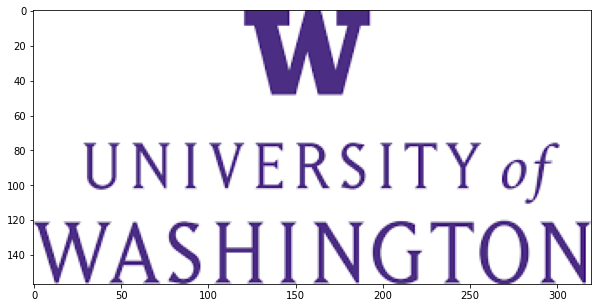

In [3]:
import imageio
import matplotlib.pyplot as plt
 
 
pic = imageio.imread('/content/sample_data/DSML_27_042022.png')
plt.figure(figsize = (10,10))#size of grid
plt.imshow(pic)

In [4]:
print('Type of the image : ' , type(pic))
print('Shape of the image : {}'.format(pic.shape))
print('Image Hight {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))#RGB=3dim




Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (157, 320, 4)
Image Hight 157
Image Width 320
Dimension of Image 3


In [5]:
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))


Image size 200960
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [8]:
#Lets pick a specific pixel located at 100th row and 50th column
pic[100,50]

Array([255, 255, 255, 255], dtype=uint8)

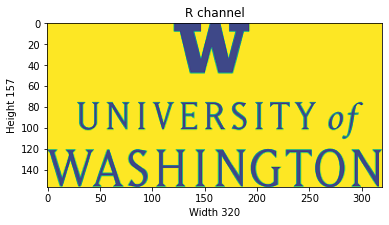

In [6]:
plt.title('R channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
 
plt.imshow(pic[ : , : , 0])
plt.show()


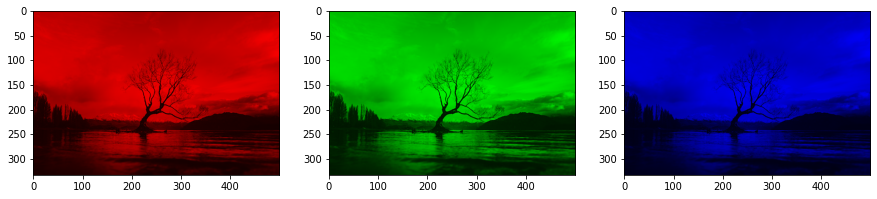

In [7]:
#splitting layers
import numpy as np
pic = imageio.imread('/content/sample_data/DSML_27_042022.jpg')
 
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
 
for c, ax in zip(range(3), ax):
 
   # create zero matrix
   split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
 
   # assing each channel
   split_img[ :, :, c] = pic[ :, :, c]
 
   # display each channel
   ax.imshow(split_img)


(-0.5, 499.5, 332.5, -0.5)

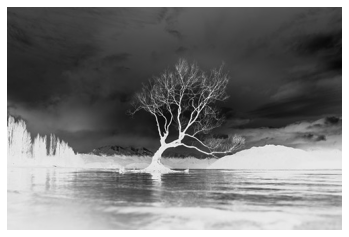

In [8]:
#generating negative pixel
negative =255- pic # neg = (L-1) - img
 
plt.figure(figsize= (6,6))
plt.imshow(negative)
plt.axis('off')




(-0.5, 499.5, 332.5, -0.5)

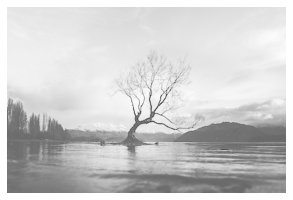

In [9]:
#gamma correctionfor brightness
import imageio
import matplotlib.pyplot as plt
 
# Gamma encoding
pic=imageio.imread('/content/sample_data/DSML_27_042022.jpg')
gamma=2.8 # Gamma < 1 ~ Dark ; Gamma > 1 ~ Bright
 
gamma_correction=((pic/255)**(1/gamma))
plt.figure(figsize=(5,5))
plt.imshow(gamma_correction)
plt.axis('off')

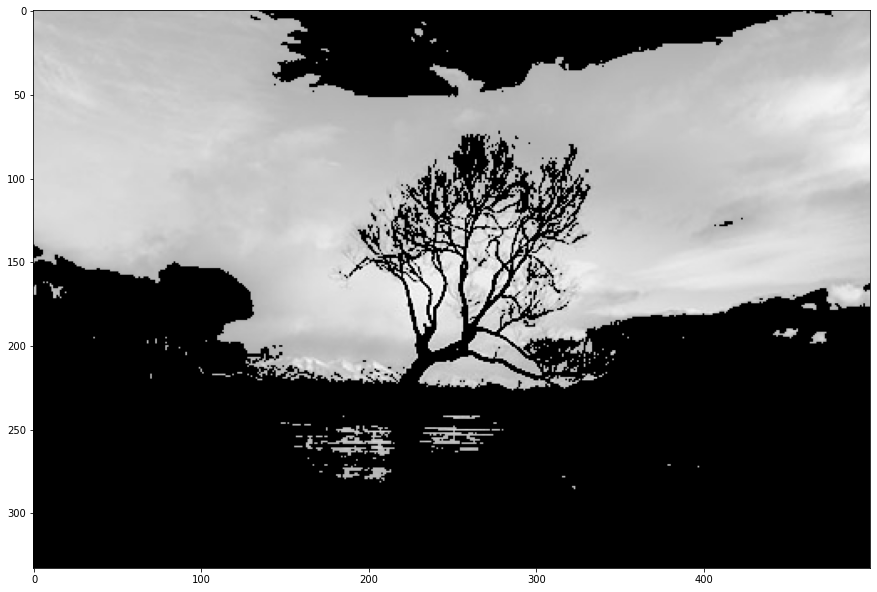

In [10]:
#Detecting High Pixel of Each Channel
 
# Only Red Pixel value , higher than 180
import numpy as np
pic=imageio.imread('/content/sample_data/DSML_27_042022.jpg')
 
red_mask=pic[:,:,0]<180
 
pic[red_mask]=0#changing all lower than 180 values to 0
 
plt.figure(figsize=(15,15))
 
plt.imshow(pic) 
 
# Only Green Pixel value , higher than 180
 
pic=imageio.imread('/content/sample_data/DSML_27_042022.jpg')


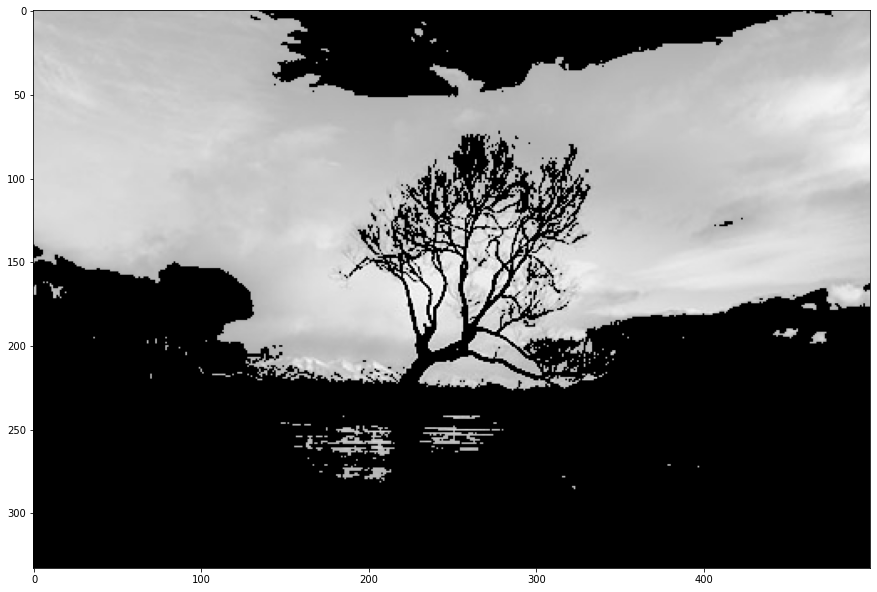

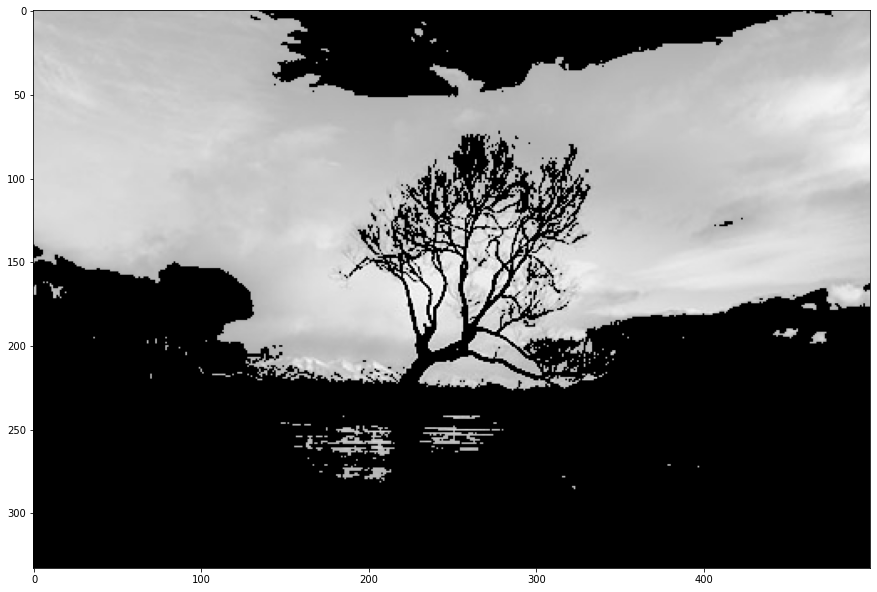

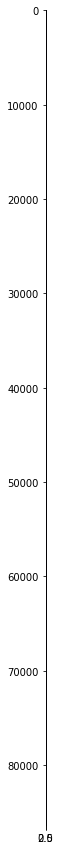

In [11]:
green_mask=pic[:,:,1]<180
 
pic[green_mask]=0#changing all lower than 180 values to 0
 
plt.figure(figsize=(15,15))
 
plt.imshow(pic) 
 
# Only Blue Pixel value , higher than 180
 
pic=imageio.imread('/content/sample_data/DSML_27_042022.jpg')
 
blue_mask=pic[:,:,2]<180
 
pic[blue_mask]=0#changing all lower than 180 values to 0
 
plt.figure(figsize=(15,15))
 
plt.imshow(pic)
 
# Composite mask using logical_and
 
pic=imageio.imread('/content/sample_data/DSML_27_042022.jpg')
 
final_mask=np.logical_and(red_mask,green_mask,blue_mask)
 
pic[final_mask]=40#changing all lower than 180 values to 40
 
plt.figure(figsize=(15,15))
plt.imshow(pic[final_mask])


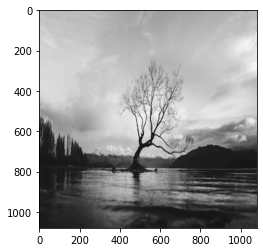

In [12]:
#RESIZE
import imageio
from skimage.transform import resize
 
img = imageio.imread('/content/sample_data/DSML_27_042022.jpg')
img = resize(img, (1080, 1080))
plt.imshow(img)


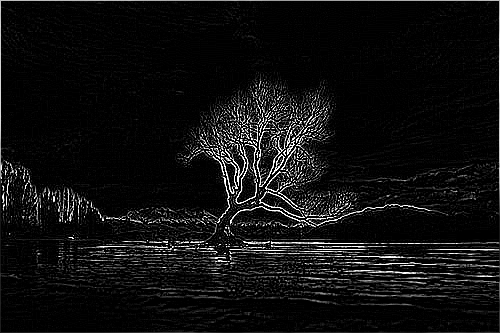

In [14]:
from PIL import Image, ImageFilter
 
# Opening the image (R prefixed to string
# in order to deal with '\' in paths)
image = Image.open(r"/content/sample_data/DSML_27_042022.jpg")
 # Converting the image to grayscale, as edge detection
# requires input image to be of mode = Grayscale (L)
image = image.convert("L")
 # Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
image = image.filter(ImageFilter.FIND_EDGES)
 # Saving the Image Under the name Edge_Sample.png
image.save(r"Edge_Sample.png")
 
#plt.imshow(image)
image


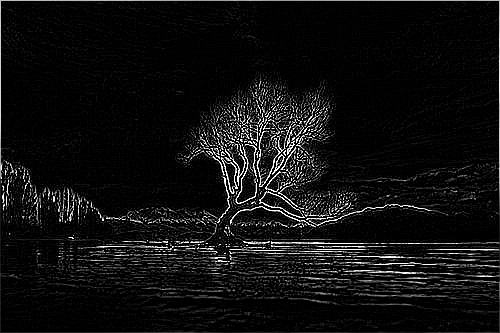

In [16]:
from PIL import Image
 
from PIL import ImageFilter
 
# Create an image object
 
image = Image.open("/content/sample_data/DSML_27_042022.jpg")
 
# Find the edges by applying the filter ImageFilter.FIND_EDGES
 
imageWithEdges = image.filter(ImageFilter.FIND_EDGES)
 
# display the original show
image
 
# display the new image with edge detection done
 
 
imageWithEdges


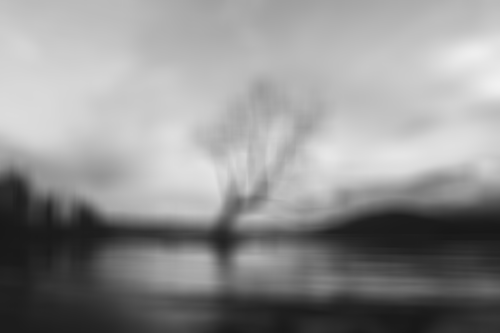

In [17]:
# Importing Image class from PIL module
from PIL import Image
# Opens a image in RGB mode
im = Image.open("/content/sample_data/DSML_27_042022.jpg")
# Blurring the image
im1 = im.filter(ImageFilter.BoxBlur(9))
#Parameters: 
 
#radius: Size of the box in one direction.
#Radius 0 does not blur, returns an identical image.
#Radius 1 takes 1 pixel in each direction, i.e. 9 pixels in total.
# Shows the image in image viewer
im1


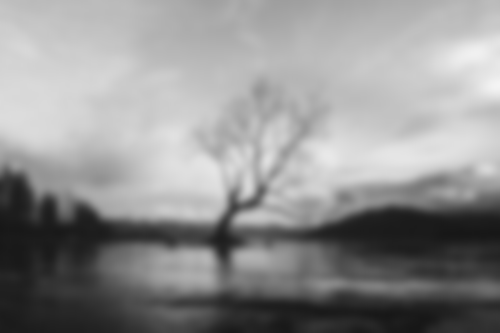

In [19]:
# Importing Image class from PIL module
from PIL import Image
# Opens a image in RGB mode
im = Image.open("/content/sample_data/DSML_27_042022.jpg")
# Blurring the image
im1 = im.filter(ImageFilter.GaussianBlur(4))
# Shows the image in image viewer
im1



**OCR With Tessaract**

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [4]:
import pytesseract
import shutil
import os
import random
try:
   from PIL import Image
except ImportError:
   import Image


In [5]:
from google.colab import files
 
uploaded = files.upload()


Saving TheSecret_Quote.jpg to TheSecret_Quote.jpg


In [6]:
extractedInformation = pytesseract.image_to_string(Image.open('/content/sample_data/TheSecret_Quote.jpg'))
print(extractedInformation)


o

a ee ae

~The universe will start to rearrange ~
itself to make it happen for pou.”



In [9]:
!pip install gTTs

In [10]:
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio #Import Audio method from IPython's Display Class
tts = gTTS('hello nethaji') #Provide the string to convert to speech
tts.save('1.wav') #save the string converted to speech as a .wav file
sound_file = '1.wav'
Audio(sound_file, autoplay=True)
 
#Autoplay = True will play the sound au
 


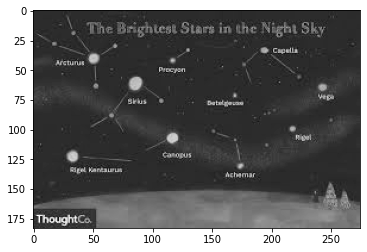

In [15]:
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread
import matplotlib.cm as cm

example_file = glob.glob(r"/content/sample_data/fewStars.jpg")[0]
im = imread(example_file, as_gray=True)
plt.imshow(im, cmap=cm.gray)
plt.show()


Number of stars counted :  253


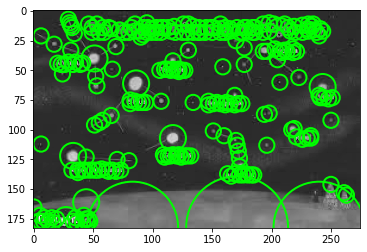

In [16]:
blobs_log = blob_log(im, max_sigma=30, num_sigma=10, threshold=.1)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
numrows = len(blobs_log)
print("Number of stars counted : " ,numrows)


fig, ax = plt.subplots(1, 1)
plt.imshow(im, cmap=cm.gray)
for blob in blobs_log:
   y, x, r = blob
   c = plt.Circle((x, y), r+5, color='lime', linewidth=2, fill=False)
   ax.add_patch(c)


In [2]:
!pip install face-recognition


     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=f6c77eee1b299a8242a03509fe62963e1260e7fb565dc24c40d747ca1019ae55
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [5]:
import PIL.Image
import PIL.ImageDraw
import face_recognition


In [11]:
given_image = face_recognition.load_image_file('/content/sample_data/multiple_face.jpg')


In [12]:
face_locations = face_recognition.face_locations(given_image)

In [13]:
number_of_faces = len(face_locations)
print("We found {} face(s) in this image.".format(number_of_faces))


We found 0 face(s) in this image.


In [14]:
pil_image = PIL.Image.fromarray(given_image)

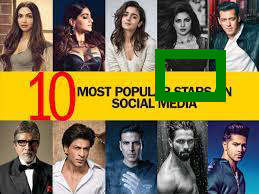

In [15]:
for face_location in face_locations:
   top, left, bottom, right = face_location
   print("A face is detected at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))


draw = PIL.ImageDraw.Draw(pil_image)
draw.rectangle([left, top, right, bottom], outline="green", width=10)


 
pil_image

